# Support Vector Machines(SVM)
Optimal Decision Boundaries(一般來說，我們希望我們的決策邊界盡可能遠離訓練點)

Predictions for new points: [0. 1.]


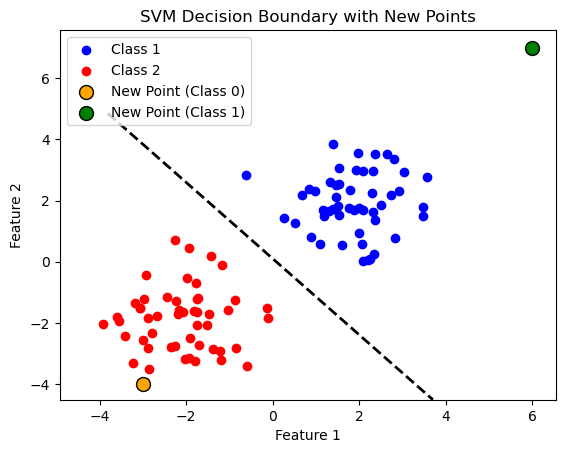

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# 1. 生成資料點和標籤
# 使用隨機生成器產生兩個類別的資料點
np.random.seed(42)  # 設定隨機種子，確保結果可重現
class_1_points = np.random.randn(50, 2) + [2, 2]  # 類別1：均值為 [2, 2] 的高斯分佈
class_1_labels = np.ones(50)  # 類別1的標籤為1
class_2_points = np.random.randn(50, 2) + [-2, -2]  # 類別2：均值為 [-2, -2] 的高斯分佈
class_2_labels = np.zeros(50)  # 類別2的標籤為0

# 合併資料點與標籤
points = np.vstack((class_1_points, class_2_points))  # 合併類別1和類別2的資料點
labels = np.hstack((class_1_labels, class_2_labels))  # 合併類別1和類別2的標籤

# 2. 訓練 SVM 模型
classifier = SVC(kernel='linear', probability=True)  # 使用線性核的 SVM 並啟用機率估計
classifier.fit(points, labels)  # 使用資料點與標籤訓練 SVM 模型

# 3. 預測新資料點
new_points = np.array([[-3, -4], [6, 7]])  # 新的資料點
predictions = classifier.predict(new_points)  # 預測新資料點的類別
print("Predictions for new points:", predictions)  # 輸出預測結果

# 4. 定義繪圖函數
def plot_svm_with_new_points(points, labels, model, new_points, predictions):
    """
    繪製 SVM 的決策邊界，並將新資料點標示出來。
    """
    # 繪製原始資料點
    plt.scatter(points[labels == 1, 0], points[labels == 1, 1], color='b', label='Class 1')  # 類別1
    plt.scatter(points[labels == 0, 0], points[labels == 0, 1], color='r', label='Class 2')  # 類別2

    # 繪製新資料點，顏色依據預測類別
    for point, prediction in zip(new_points, predictions):
        plt.scatter(
            point[0], point[1],
            color='g' if prediction == 1 else 'orange',  # 類別1使用綠色，類別0使用橘色
            s=100, edgecolor='k', label=f"New Point (Class {int(prediction)})"
        )

    # 繪製 SVM 決策邊界
    x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1  # 決策邊界 x 範圍
    y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1  # 決策邊界 y 範圍
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))  # 建立網格
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])  # 計算網格上每個點的決策值
    Z = Z.reshape(xx.shape)

    # 繪製決策邊界（Z=0 的等高線）
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black', linestyles='--')
    
    # 設置圖例與標題
    plt.legend(loc='best')
    plt.title("SVM Decision Boundary with New Points")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# 5. 繪製圖形
plot_svm_with_new_points(points, labels, classifier, new_points, predictions)

# Kernels

Validation Accuracy: 1.0


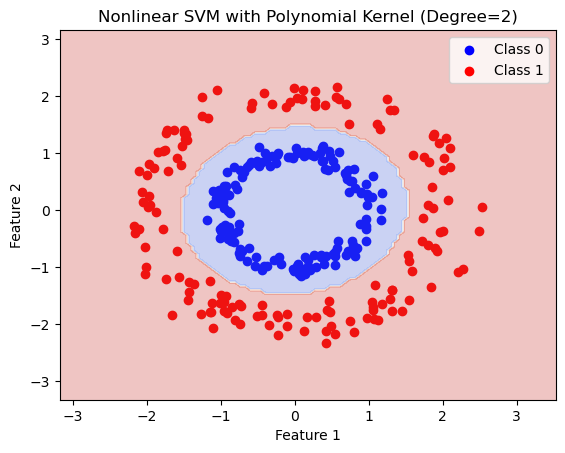

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# 生成資料：兩個同心圓
# 設定隨機種子以保證結果可重現
np.random.seed(42)
n_samples = 300  # 資料總數

# 生成內圈資料
inner_circle = np.random.randn(n_samples // 2, 2) * 0.5  # 初始內圈資料
inner_circle_radius = np.sqrt(inner_circle[:, 0]**2 + inner_circle[:, 1]**2)  # 計算半徑
inner_circle = inner_circle / inner_circle_radius[:, np.newaxis]  # 正規化為單位圓
inner_circle *= 1 + 0.1 * np.random.randn(inner_circle.shape[0], 1)  # 加入噪聲調整

# 生成外圈資料
outer_circle = np.random.randn(n_samples // 2, 2)  # 初始外圈資料
outer_circle_radius = np.sqrt(outer_circle[:, 0]**2 + outer_circle[:, 1]**2)  # 計算半徑
outer_circle = outer_circle / outer_circle_radius[:, np.newaxis]  # 正規化為單位圓
outer_circle *= 2 + 0.2 * np.random.randn(outer_circle.shape[0], 1)  # 加入噪聲調整

# 標籤：內圈為 0，外圈為 1
points = np.vstack([inner_circle, outer_circle])  # 合併內圈與外圈資料
labels = np.hstack([np.zeros(n_samples // 2), np.ones(n_samples // 2)])  # 對應的標籤

# 資料切分：80% 作為訓練集，20% 作為驗證集
training_data, validation_data, training_labels, validation_labels = train_test_split(
    points, labels, train_size=0.8, test_size=0.2, random_state=100
)

# 訓練 SVM 模型，使用多項式核函數
classifier = SVC(kernel='poly', degree=2)  # 指定多項式核函數，次數為 2
classifier.fit(training_data, training_labels)  # 用訓練集進行模型擬合

# 驗證模型的準確率
score = classifier.score(validation_data, validation_labels)  # 在驗證集上評估準確率
print(f"Validation Accuracy: {score}")  # 輸出準確率

# 繪圖函數：顯示資料點及決策邊界
def plot_data_and_decision_boundary(points, labels, model):
    # 繪製資料點：內圈（藍色）與外圈（紅色）
    plt.scatter(points[labels == 0, 0], points[labels == 0, 1], color='b', label='Class 0')  # 類別 0
    plt.scatter(points[labels == 1, 0], points[labels == 1, 1], color='r', label='Class 1')  # 類別 1

    # 繪製 SVM 決策邊界
    x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1  # x 軸範圍
    y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1  # y 軸範圍
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))  # 建立網格
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])  # 對網格點進行分類
    Z = Z.reshape(xx.shape)  # 重塑分類結果為網格形狀

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)  # 用顏色填充決策區域
    plt.legend()  # 顯示圖例
    plt.title("Nonlinear SVM with Polynomial Kernel (Degree=2)")  # 圖表標題
    plt.xlabel("Feature 1")  # x 軸標籤
    plt.ylabel("Feature 2")  # y 軸標籤
    plt.show()  # 顯示圖表

# 調用繪圖函數
plot_data_and_decision_boundary(points, labels, classifier)

# Radial Basis Function Kernel

Gamma: 0.01, Validation Accuracy: 0.75


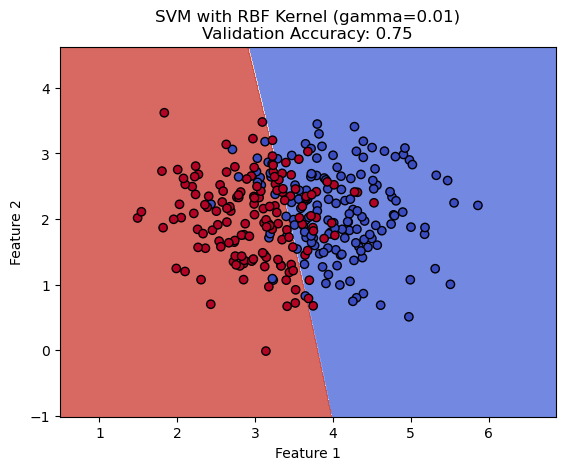

Gamma: 0.1, Validation Accuracy: 0.75


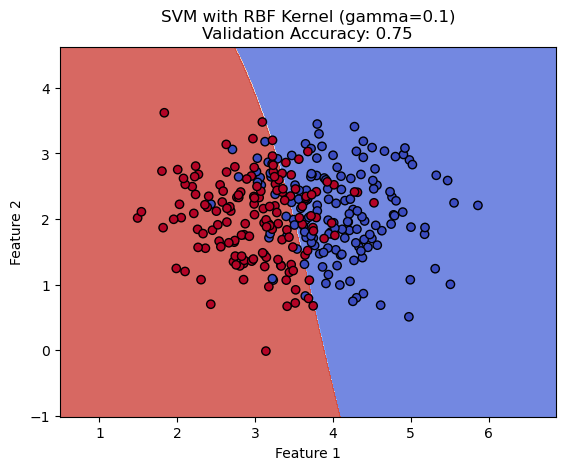

Gamma: 1, Validation Accuracy: 0.72


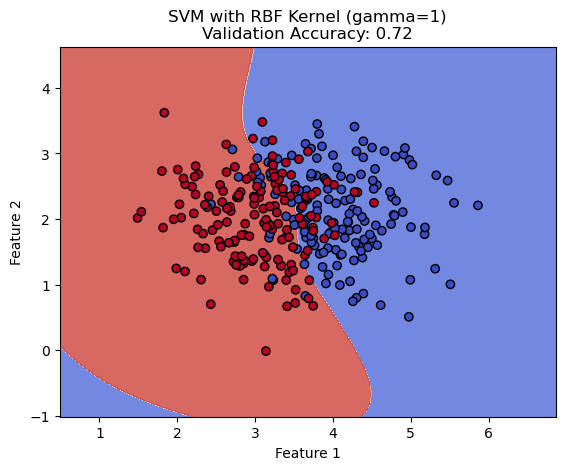

Gamma: 10, Validation Accuracy: 0.70


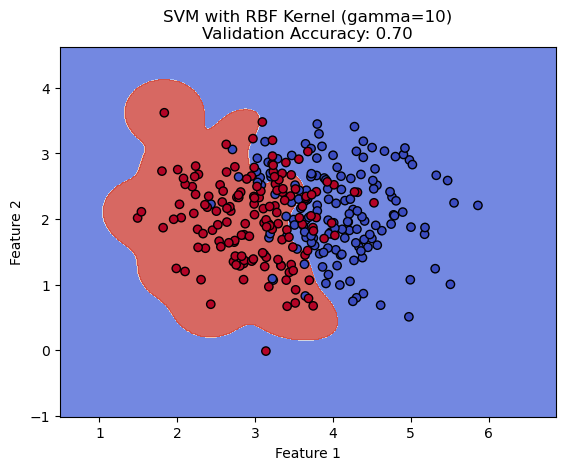

Gamma: 100, Validation Accuracy: 0.65


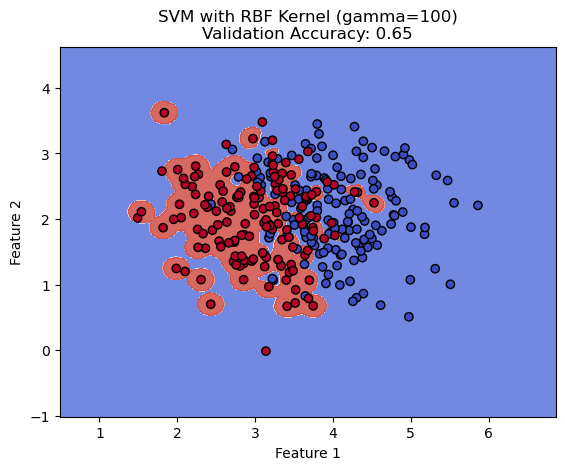

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# 生成兩類資料
n_samples = 300  # 資料總數
# 第一類資料：以 (4, 2) 為中心，加入標準差為 0.6 的正態分佈噪聲
class_0 = np.random.randn(n_samples // 2, 2) * 0.6 + np.array([4, 2])
# 第二類資料：以 (3, 2) 為中心，加入標準差為 0.6 的正態分佈噪聲
class_1 = np.random.randn(n_samples // 2, 2) * 0.6 + np.array([3, 2])

# 合併資料與標籤
points = np.vstack([class_0, class_1])  # 合併資料點
labels = np.hstack([np.zeros(n_samples // 2), np.ones(n_samples // 2)])  # 第一類標籤為 0，第二類標籤為 1

# 將資料分為訓練集與驗證集
training_data, validation_data, training_labels, validation_labels = train_test_split(
    points, labels, train_size=0.8, test_size=0.2, random_state=100
)

# 函數：測試不同 gamma 值並繪製決策邊界與資料點
def plot_decision_boundary_and_points(gamma):
    # 使用 RBF 核函數（徑向基核）初始化 SVM 模型
    classifier = SVC(kernel="rbf", gamma=gamma)
    classifier.fit(training_data, training_labels)  # 訓練模型
    
    # 在驗證集上計算準確率
    score = classifier.score(validation_data, validation_labels)
    print(f"Gamma: {gamma}, Validation Accuracy: {score:.2f}")
    
    # 建立繪圖網格
    x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1  # x 軸範圍
    y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1  # y 軸範圍
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 500),  # x 軸細分為 500 個點
        np.linspace(y_min, y_max, 500)   # y 軸細分為 500 個點
    )
    
    # 將網格點資料傳入模型進行分類
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)  # 重塑為網格形狀
    
    # 繪製分類邊界
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)  # 決策區域顏色填充
    
    # 繪製資料點
    plt.scatter(points[:, 0], points[:, 1], c=labels, edgecolors="k", cmap=plt.cm.coolwarm)
    plt.title(f"SVM with RBF Kernel (gamma={gamma})\nValidation Accuracy: {score:.2f}")  # 標題顯示 gamma 與準確率
    plt.xlabel("Feature 1")  # x 軸標籤
    plt.ylabel("Feature 2")  # y 軸標籤
    plt.show()  # 顯示圖表

# 測試多個 gamma 值並繪圖
gamma_values = [0.01, 0.1, 1, 10, 100]  # 不同 gamma 參數
for gamma in gamma_values:
    plot_decision_boundary_and_points(gamma)

In [4]:
import datetime

current_date = datetime.datetime.now().strftime("%Y年%m月%d日")
print(f"更新日期: {current_date}")

更新日期: 2024年12月01日
